Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **5. studenog 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [3]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [4]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

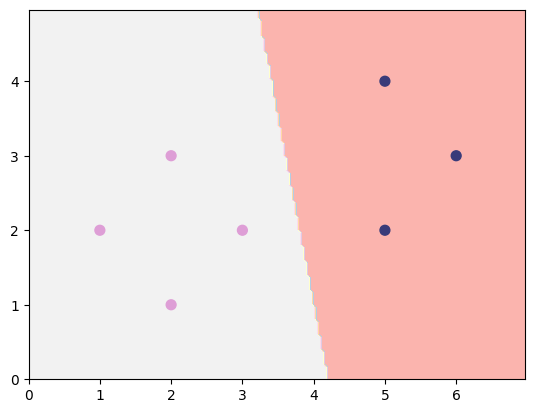

In [5]:
# Vaš kôd ovdje
model1aC = RidgeClassifier(alpha = 0)
model1aC.fit(seven_X, seven_y)

plot_2d_clf_problem(seven_X, seven_y, model1aC.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

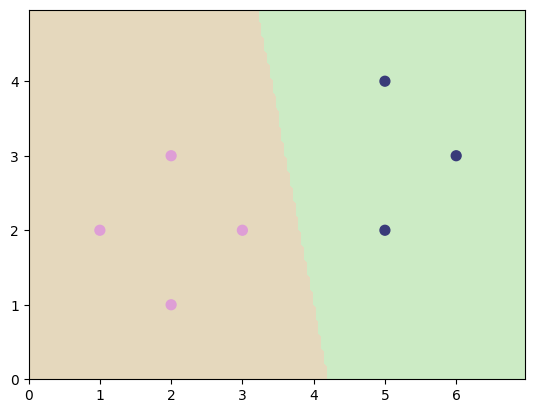

In [6]:
# Vaš kôd ovdje

model1aR = LinearRegression()
model1aR.fit(seven_X, seven_y)

plot_2d_clf_problem(seven_X, seven_y, lambda x : model1aR.predict(x) >= 0.5)


**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

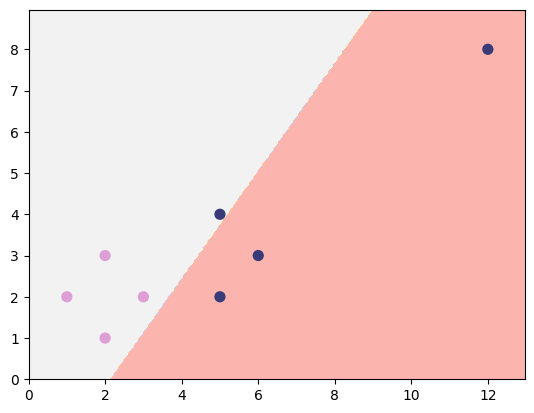

In [8]:
# Vaš kôd ovdje
model1bC = RidgeClassifier(alpha = 0)
model1bC.fit(outlier_X, outlier_y)

plot_2d_clf_problem(outlier_X, outlier_y, model1bC.predict)





**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

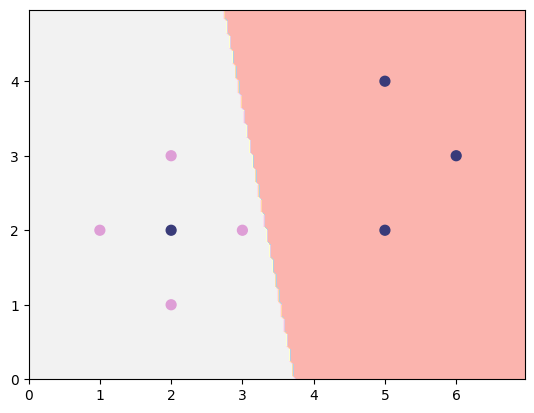

In [10]:
# Vaš kôd ovdje
model1cC = RidgeClassifier(alpha = 0)
model1cC.fit(unsep_X, unsep_y)

plot_2d_clf_problem(unsep_X, unsep_y, model1cC.predict)


**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

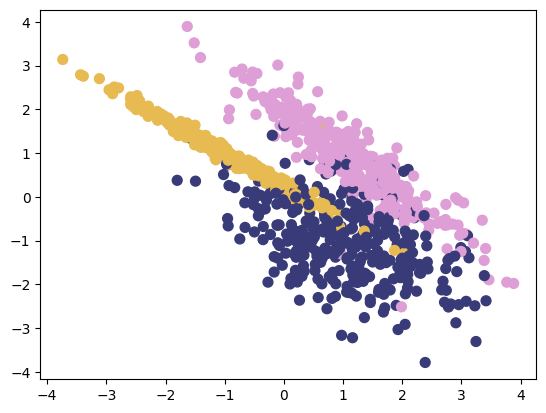

In [11]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje

random_X, random_y = make_classification(n_samples = 1000, n_features = 2, n_classes = 3, n_clusters_per_class = 1, n_informative = 2, n_redundant = 0)


plot_2d_clf_problem(random_X, random_y)



Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

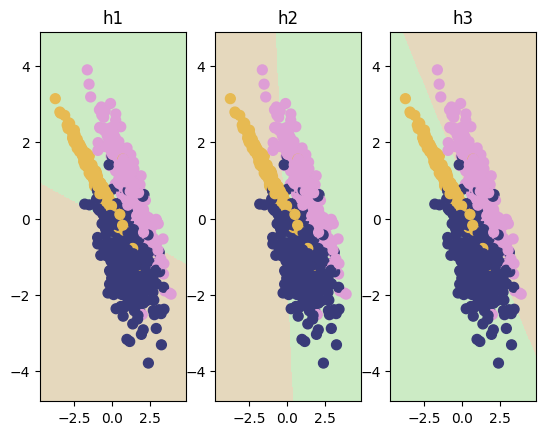

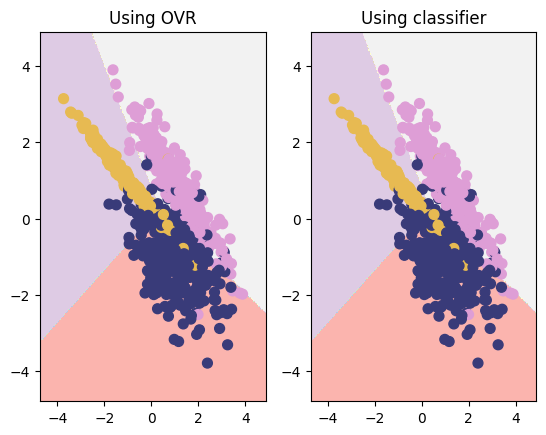

In [12]:
# Vaš kôd ovdje

k1 = (random_y == 0).astype(int)
k2 = (random_y == 1).astype(int)
k3 = (random_y == 2).astype(int)
k = [k1, k2, k3]
titles = ["h1", "h2", "h3"]
all_h=[]
for i in range(len(k)):
    plt.subplot(1,3,i+1)
    h = RidgeClassifier(alpha=0).fit(random_X, k[i])
    all_h.append(h)
    plot_2d_clf_problem(random_X, random_y, lambda x: h.predict(x) >= 0.5)
    plt.title(titles[i])
plt.show()

def predict_biggest_h(x):
    x = x[np.newaxis, :]
    all_functions=[]
    for h in all_h:
        all_functions.append(h.decision_function(x))
    return np.argmax(all_functions)

plt.subplot(1,2,1)
plt.title("Using OVR")
plot_2d_clf_problem(random_X, random_y, predict_biggest_h)
model2 = RidgeClassifier(alpha=0).fit(random_X, random_y)
plt.subplot(1,2,2)
plt.title("Using classifier")
plot_2d_clf_problem(random_X, random_y, model2.predict)
plt.show()

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

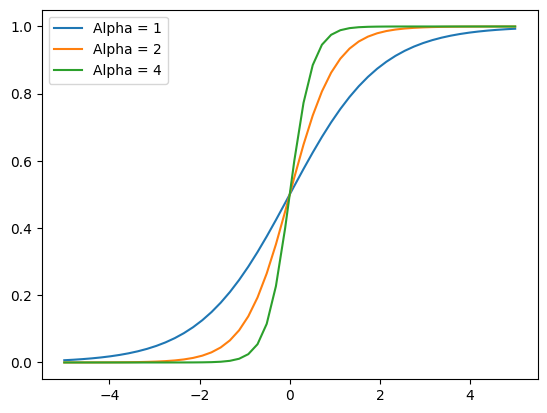

In [13]:
# Vaš kôd ovdje

def sigmoid(x, alpha=1):
    return 1 / (1 + np.exp(-1 * alpha * x))

x = np.linspace(-5, 5)

alpha_numbers = [1,2,4]

for alpha in alpha_numbers:
    y = sigmoid(x, alpha=alpha)
    plt.plot(x, y, label="Alpha = {}".format(alpha))

plt.legend()
plt.show()


**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [47]:
from numpy import linalg
# Vaš kôd ovdje
import math

from sklearn.preprocessing import PolynomialFeatures


def lr_h(x, w):
    return sigmoid(np.dot(x, w))

def cross_entropy_error(X, y, w):
    counter = 0
    sum = 0
    for x in X:
        loss = -1 * y[counter] * math.log(lr_h(x,w)) - (1-y[counter]) * math.log(1-lr_h(x,w))
        sum += loss
        counter += 1
    return sum / X.shape[1]


def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    poly = PolynomialFeatures(degree=1, include_bias=True)
    X_new = poly.fit_transform(X)
    w = np.zeros(X_new.shape[1])
    errors = []
    trace = []
    for i in range(0,max_iter):
        delta_w = np.zeros(X_new.shape[1])
        counter = 0
        for x in X_new:
            h = lr_h(x, w)
            delta_w = delta_w - (h - y[counter])*x
            counter+=1
        w[0] = w[0] + eta*delta_w[0]
        w[1:] = w[1:]*(1-eta*alpha) + eta*delta_w[1:]
        w = w + eta*delta_w
        trace.append(w)
        error = cross_entropy_error(X_new,y,w)
        if len(errors)==0: pass
        else:
            if abs(error - errors[i-1]) < epsilon:
                break
        errors.append(error)
    return (w, trace) if trace else w

   

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [48]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Cross entropy error: 0.15398683073357008
[ 7.03141279 -2.23398768  0.49968576]


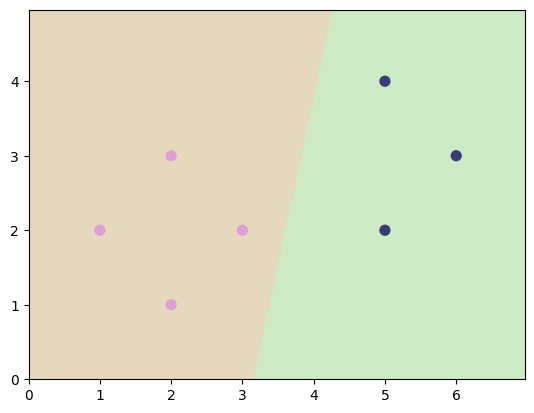

In [49]:
# Vaš kôd ovdje

w, trace = lr_train(seven_X, seven_y, trace=True)
poly = PolynomialFeatures(degree=1, include_bias=True)
seven_X_new = poly.fit_transform(seven_X)
ce_error = cross_entropy_error(seven_X_new, seven_y, w)
print("Cross entropy error: {}".format(ce_error))
plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(poly.transform(x), w) >= 0.5)
print(w)



**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [35]:
from sklearn.metrics import zero_one_loss

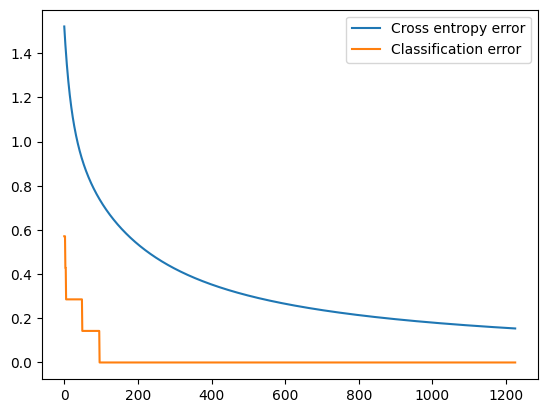

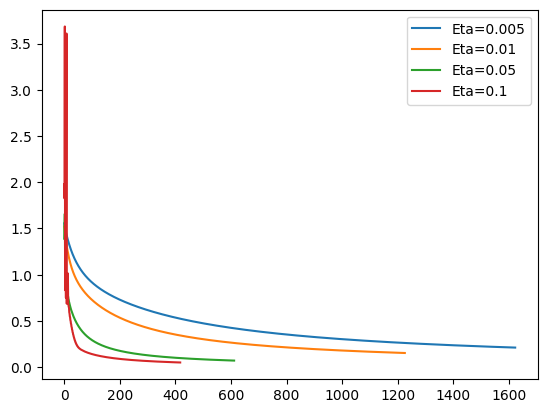

In [50]:
# Vaš kôd ovdje
errors = []
classification_errors = []
for wk in trace:
    predictions_k = []
    errors.append(cross_entropy_error(seven_X_new, seven_y, wk))
    for x in seven_X_new:
       predictions_k = np.append(predictions_k, lr_h(x, wk))
    predictions_k = (predictions_k > 0.5).astype(int)
    classification_errors.append(zero_one_loss(predictions_k, seven_y))

plt.plot(errors, label="Cross entropy error")
plt.plot(classification_errors, label="Classification error")
plt.legend()
plt.show()


etas = [0.005, 0.01, 0.05, 0.1]
for eta in etas:
    ce_errors = []
    w, trace = lr_train(seven_X, seven_y, eta=eta, trace=True)
    poly = PolynomialFeatures(degree=1, include_bias=True)
    seven_X_new = poly.fit_transform(seven_X)
    for wk in trace:
        ce_errors.append(cross_entropy_error(seven_X_new, seven_y, wk))
    plt.plot(ce_errors, label="Eta={}".format(eta))

plt.legend()
plt.show()
        
    


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

In [19]:
from sklearn.linear_model import LogisticRegression

# Vaš kôd ovdje

model3e = LogisticRegression(penalty=None, tol=0.0001, max_iter=2000).fit(seven_X, seven_y)
print(model3e.intercept_)
print(model3e.coef_)




[46.26968486]
[[-14.80304235   4.33454163]]


### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [20]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

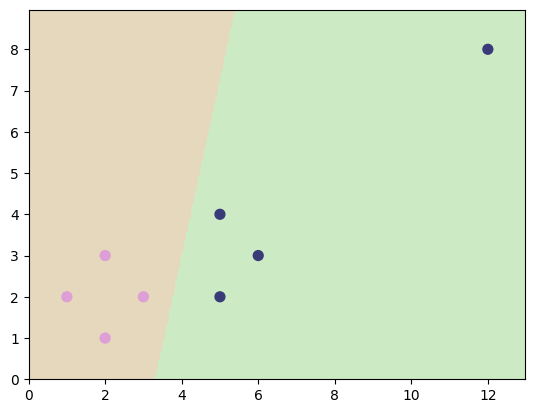

In [21]:
# Vaš kôd ovdje
model4a = LogisticRegression(penalty=None, tol=0.0001, max_iter=2000).fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, lambda x: model4a.predict(x) >= 0.5)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

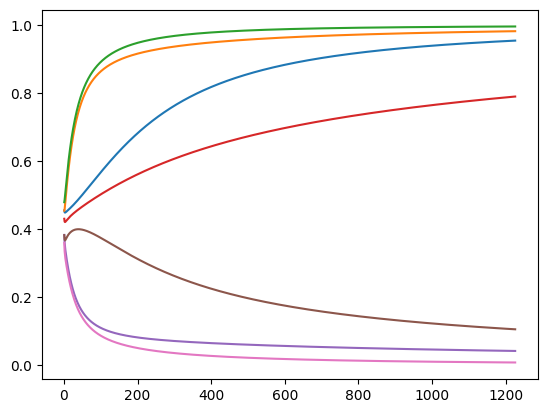

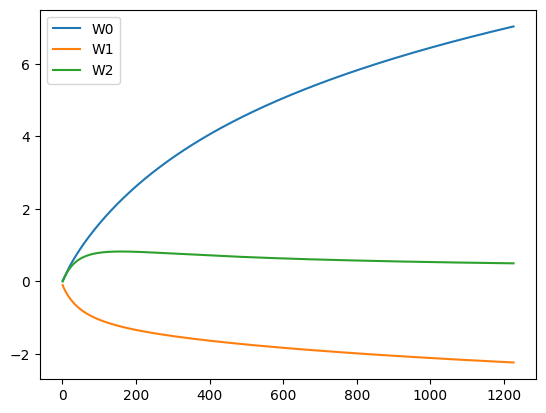

In [22]:
# Vaš kôd ovdje
hs=[]
ws=[]

w, trace = lr_train(seven_X, seven_y, trace=True)

all_iterations = []
for i in range(1, len(trace)+1):
    all_iterations.append(i)

poly = PolynomialFeatures(degree=1, include_bias=True)
seven_X_bias = poly.fit_transform(seven_X)
for wk in trace:
    hs_in_wk = []
    for x in seven_X_bias:
        h=lr_h(x,wk)
        hs_in_wk.append(h)
    hs.append(hs_in_wk)

w0s=[]
w1s=[]
w2s=[]
for wk in trace:
    w0s.append(wk[0])
    w1s.append(wk[1])
    w2s.append(wk[2])

ws.append(w0s)
ws.append(w1s)
ws.append(w2s)

plt.plot(all_iterations, hs) 
plt.show()

plt.plot(all_iterations, w0s, label="W0")
plt.plot(all_iterations, w1s, label="W1")
plt.plot(all_iterations, w2s, label="W2")
plt.legend()
plt.show()


### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [23]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

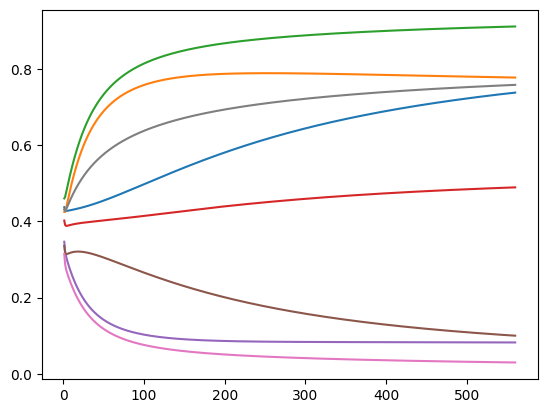

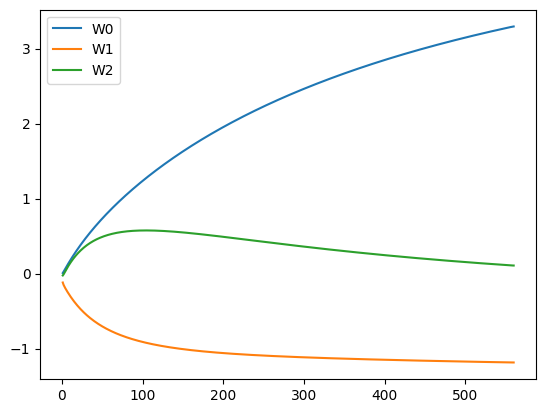

In [24]:
# Vaš kôd ovdje
hs=[]
ws=[]

w, trace = lr_train(unsep_X, unsep_y, trace=True)

all_iterations = []
for i in range(1, len(trace)+1):
    all_iterations.append(i)

poly = PolynomialFeatures(degree=1, include_bias=True)
unsep_X_bias = poly.fit_transform(unsep_X)
for wk in trace:
    hs_in_wk = []
    for x in unsep_X_bias:
        h=lr_h(x,wk)
        hs_in_wk.append(h)
    hs.append(hs_in_wk)

w0s=[]
w1s=[]
w2s=[]
for wk in trace:
    w0s.append(wk[0])
    w1s.append(wk[1])
    w2s.append(wk[2])

ws.append(w0s)
ws.append(w1s)
ws.append(w2s)

plt.plot(all_iterations, hs) 
plt.show()

plt.plot(all_iterations, w0s, label="W0")
plt.plot(all_iterations, w1s, label="W1")
plt.plot(all_iterations, w2s, label="W2")
plt.legend()
plt.show()



**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [25]:
from numpy.linalg import norm

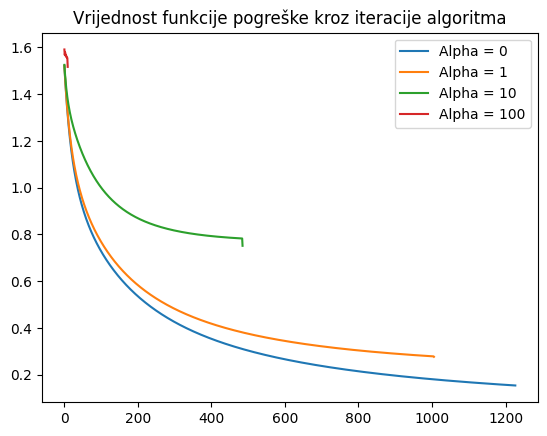

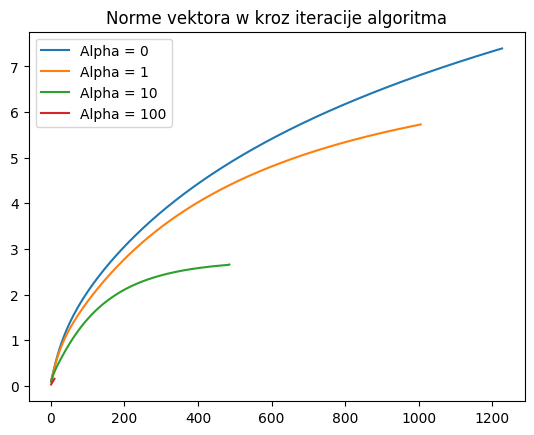

In [26]:
# Vaš kôd ovdje

poly = PolynomialFeatures(degree=1, include_bias=True)
seven_X_new = poly.fit_transform(seven_X)

alphas = [0,1,10,100]
for alpha in alphas:
    ce_errors = []
    w, trace = lr_train(seven_X, seven_y, alpha=alpha, trace=True)
    all_iterations = []
    for i in range(1, len(trace)+1):
        all_iterations.append(i)
    for wk in trace:
        ce_errors.append(cross_entropy_error(seven_X_new, seven_y, wk))
    plt.plot(all_iterations, ce_errors, label="Alpha = {}".format(alpha))

plt.legend()
plt.title("Vrijednost funkcije pogreške kroz iteracije algoritma")
plt.show()

for alpha in alphas:
    norms = []
    w, trace = lr_train(seven_X, seven_y, alpha=alpha, trace=True)
    all_iterations = []
    for i in range(1, len(trace)+1):
        all_iterations.append(i)
    for wk in trace:
        norms.append(norm(wk))
    plt.plot(all_iterations, norms, label="Alpha = {}".format(alpha))

plt.legend()
plt.title("Norme vektora w kroz iteracije algoritma")
plt.show()
    
    



**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [27]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

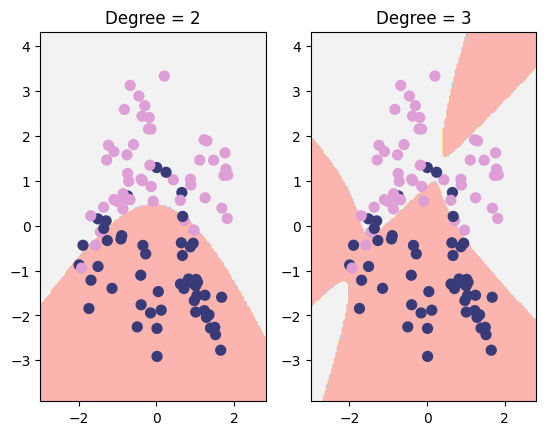

In [28]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje

X, y = make_classification(n_features=2, n_clusters_per_class=2, n_informative=2, n_redundant=0, n_classes=2)
poly2 = PolynomialFeatures(degree=2, include_bias=True)
X_degree_2 = poly2.fit_transform(X)
poly3 = PolynomialFeatures(degree=3, include_bias=True)
X_degree_3 = poly3.fit_transform(X)

model_d2 = LogisticRegression(penalty=None, tol=0.0001, max_iter=2000).fit(X_degree_2, y)
model_d3 = LogisticRegression(penalty=None, tol=0.0001, max_iter=2000).fit(X_degree_3, y)
plt.subplot(1,2,1)
plt.title("Degree = 2")
plot_2d_clf_problem(X, y, lambda x : model_d2.predict(poly2.transform(x)))
plt.subplot(1,2,2)
plt.title("Degree = 3")
plot_2d_clf_problem(X, y, lambda x : model_d3.predict(poly3.transform(x)))



**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?